In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import numpy as np

plt.style.use('ggplot')


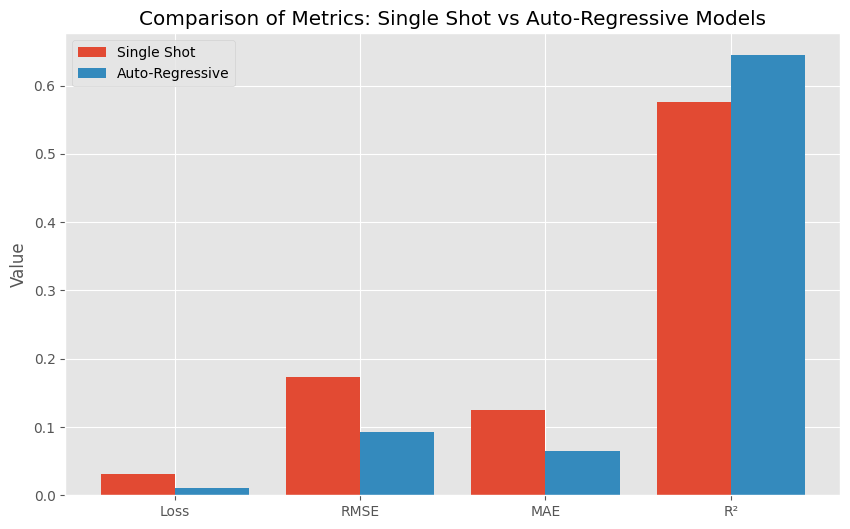

AttributeError: 'list' object has no attribute 'shape'

In [8]:
import numpy as np
import matplotlib.pyplot as plt


single_shot_results = results['single_shot']
ar_results = results['auto_regressive']

# Metrics
single_shot_metrics = single_shot_results[:4]  # loss, RMSE, MAE, R²
ar_metrics = ar_results[:4]  # loss, RMSE, MAE, R²

single_shot_inputs, single_shot_predictions, single_shot_targets = single_shot_results[4:]
ar_inputs, ar_predictions, ar_targets = ar_results[4:]

metrics_names = ['Loss', 'RMSE', 'MAE', 'R²']
x = np.arange(len(metrics_names))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, single_shot_metrics, width=0.4, label='Single Shot')
plt.bar(x + 0.2, ar_metrics, width=0.4, label='Auto-Regressive')
plt.xticks(x, metrics_names)
plt.ylabel('Value')
plt.title('Comparison of Metrics: Single Shot vs Auto-Regressive Models')
plt.legend()
plt.show()

def plot_predictions(inputs, predictions, targets, title, location_index=None, feature_index=0):
    # If no specific location is provided, randomly select one
    if location_index is None:
        location_index = np.random.randint(inputs.shape[2])  # Assuming inputs have shape [samples, timesteps, locations, features]

    for _ in range(3):
        sample_index = np.random.randint(len(inputs))
        
        # Extracting data for a single feature and a single location
        input_sample = inputs[sample_index][:, location_index, feature_index]
        prediction_sample = predictions[sample_index][:, location_index, feature_index]
        target_sample = targets[sample_index][:, location_index, feature_index]

        # Time axes for input and future predictions
        time_axis_input = np.arange(len(input_sample))
        time_axis_future = np.arange(len(input_sample), len(input_sample) + len(prediction_sample))

        plt.figure(figsize=(12, 6))
        plt.plot(time_axis_input, input_sample, label='Input Data')
        plt.plot(time_axis_future, prediction_sample, label='Predicted Data')
        plt.plot(time_axis_future, target_sample, label='Target Data', linestyle='--')

        plt.title(f"{title} - Location {location_index + 1}")
        plt.xlabel('Time Steps')
        plt.ylabel('Feature Value')
        plt.legend()
        plt.show()

# Visualize Single Shot Model Predictions for Temperature at a Random Location
plot_predictions(single_shot_inputs, single_shot_predictions, single_shot_targets, 'Single Shot Model Predictions - Temperature')

# Visualize Auto-Regressive Model Predictions for Temperature at the Same Location
plot_predictions(ar_inputs, ar_predictions, ar_targets, 'Auto-Regressive Model Predictions - Temperature')


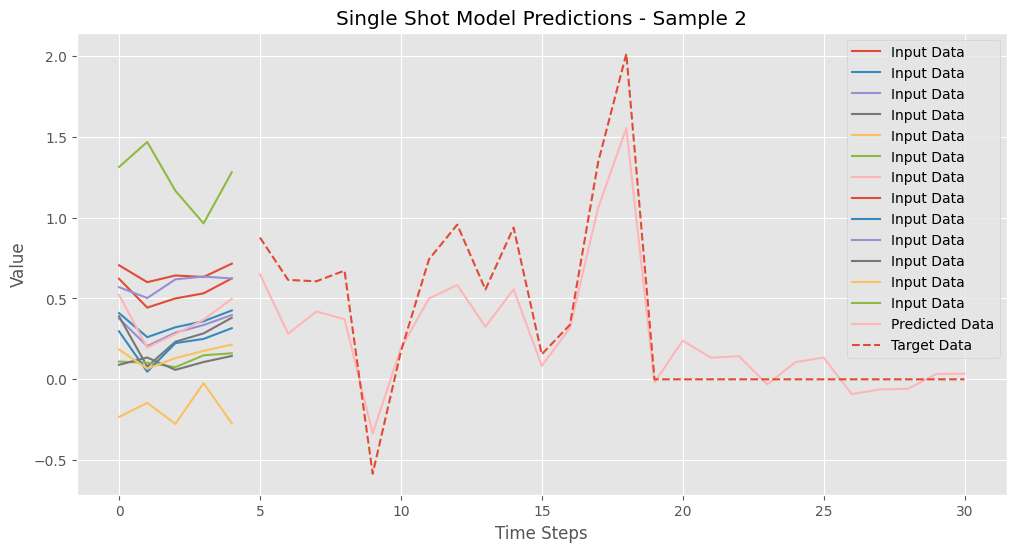

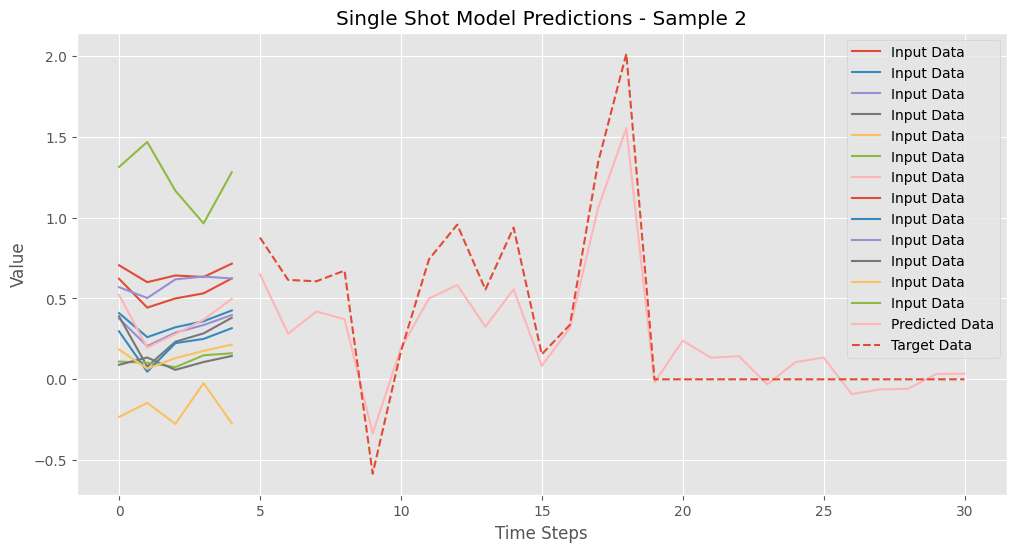

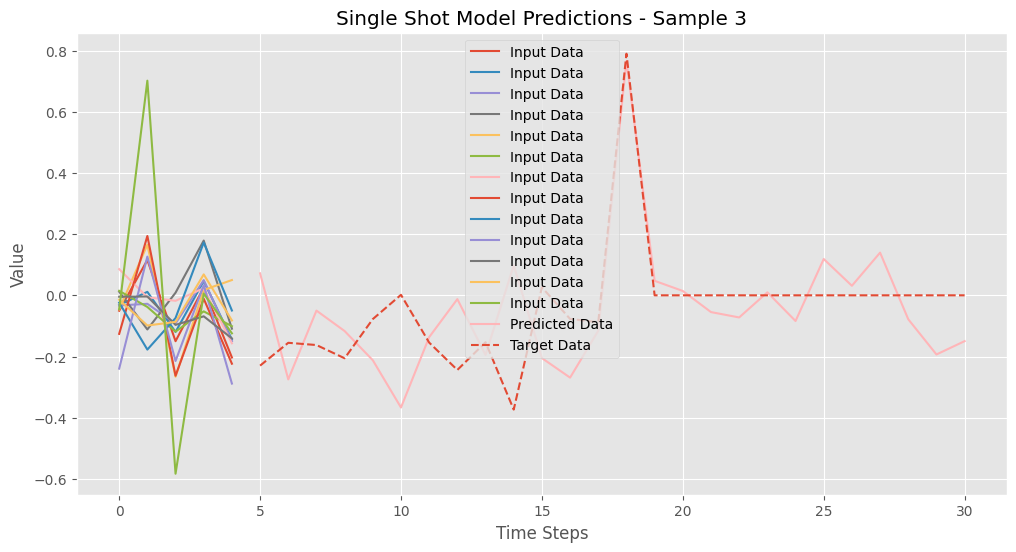

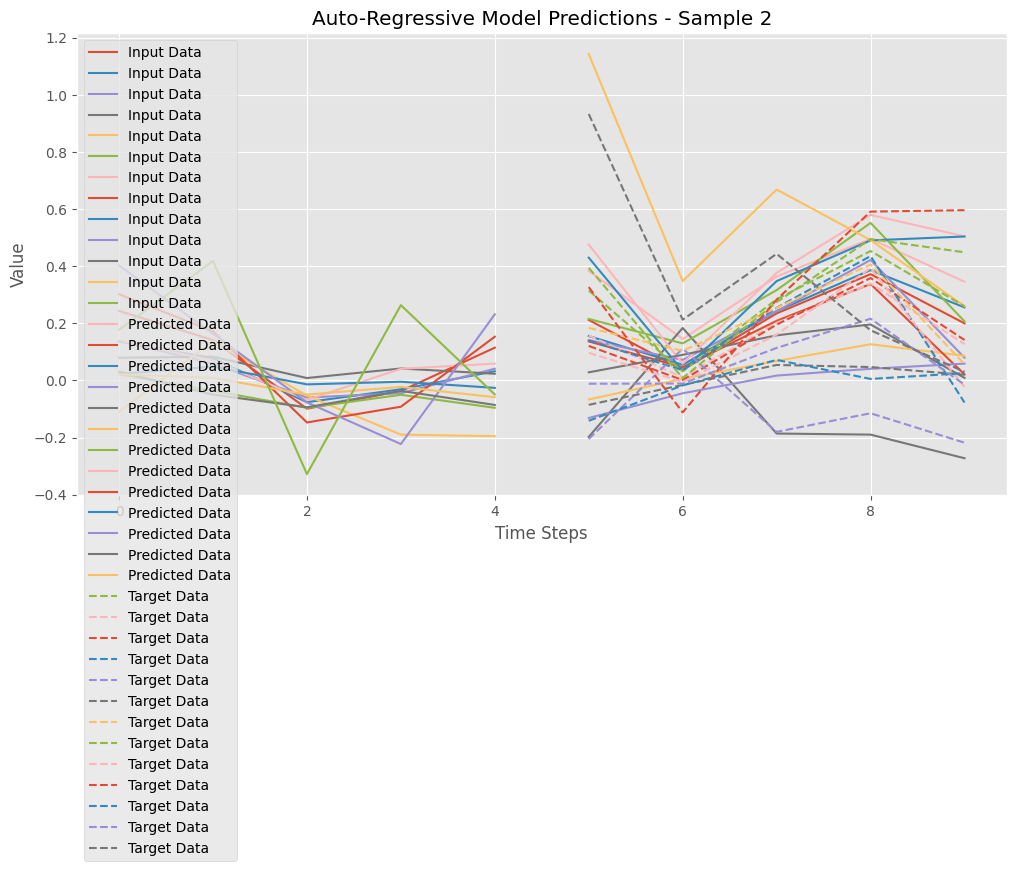

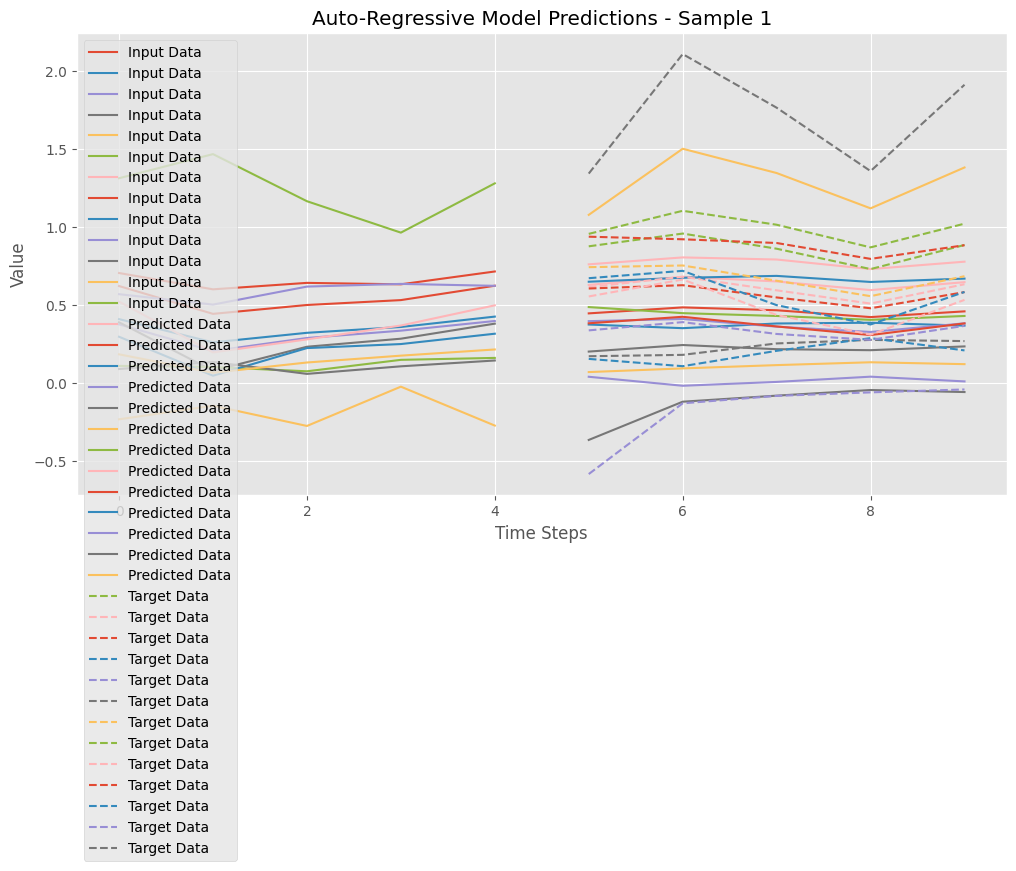

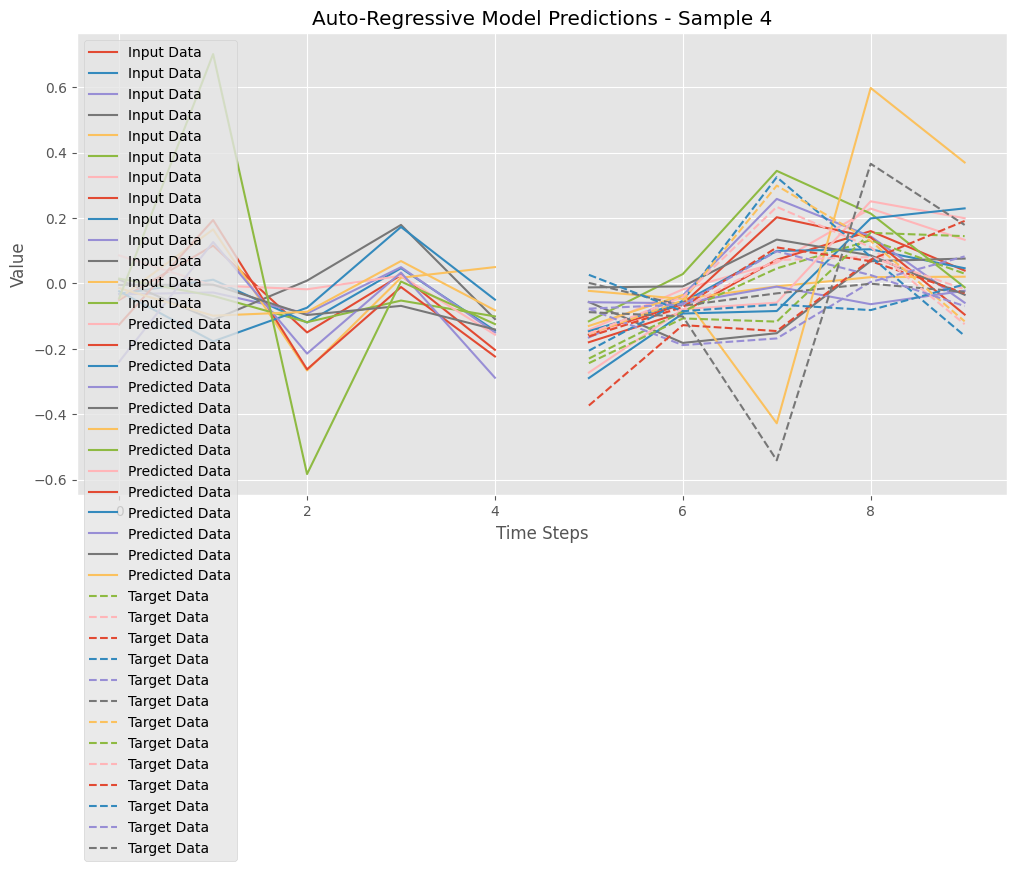

In [7]:
# Visualize Single Shot Model Predictions
plot_predictions(single_shot_inputs, single_shot_predictions, single_shot_targets, 'Single Shot Model Predictions')

# Visualize Auto-Regressive Model Predictions
plot_predictions(ar_inputs, ar_predictions, ar_targets, 'Auto-Regressive Model Predictions')
